# Predicting Loan Default Risk

## Problem Statement: This project entails developing a robust machine learning pipeline to predict loan default risk, enabling better credit decisions and minimizing financial losses

### It is a classification problem and would require the use of logistic regression to fix
+ Our target column is the good_bad_flag

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#load the three datasets
url1 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
url2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
url3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [ ]:
#read them into dataframes
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

### Data Understanding

In [ ]:
df1.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
3731,8a858e9e5b1f064e015b1f1aae1f11d1,301973029,2,2017-07-11 13:27:05.000000,2017-07-11 12:25:56.000000,10000.0,13000.0,30,NaN,Good
3018,8a858ec65cc6352b015cc9e42b441adf,301975910,2,2017-07-13 11:45:34.000000,2017-07-13 10:45:27.000000,10000.0,13000.0,30,NaN,Good


In [ ]:
df2.sample(2)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
2591,8a858fb15d41fc6b015d420039ec015f,1986-08-20 00:00:00.000000,Savings,3.357342,6.545718,GT Bank,NaN,Permanent,NaN
2668,8a858f3455a0d8070155baddc1256a8b,1995-10-23 00:00:00.000000,Other,3.196012,6.479474,GT Bank,NaN,Self-Employed,Graduate


In [ ]:
df3.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
4416,8a858fd85507735701551173e8c225b2,301627406,1,2016-06-02 19:19:45.000000,2016-06-02 18:19:39.000000,10000.0,11500.0,15,2016-06-17 00:05:19.000000,NaN,2016-06-17 00:00:00.000000,2016-06-16 15:34:15.000000
4695,8a858f0455d9feaf0155e4344e847fc6,301878634,2,2017-04-24 13:27:47.000000,2017-04-24 12:27:39.000000,10000.0,11500.0,15,2017-05-05 13:35:33.000000,NaN,2017-05-09 00:00:00.000000,2017-05-05 13:20:23.000000


In [ ]:
#inspect the data
print(df1.shape)
df1.info()

(4368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [ ]:
print(df2.shape)
df2.info()

(4346, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [ ]:
print(df3.shape)
df3.info()

(18183, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


### a) Demographic data (traindemographics.csv)
+ customerid (Primary key used to merge to other data)
+ birthdate (date of birth of the customer)
+ bank_account_type (type of primary bank account)
+ longitude_gps
+ latitude_gps
+ bank_name_clients (name of the bank)
+ bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
+ employment_status_clients (type of employment that customer has)
+ level_of_education_clients (highest level of education)

### b) Performance data (trainperf.csv) : This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict whether this loan would default given all previous loans and demographics of a customer.
+ customerid (Primary key used to merge to other data)
+ systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
+ loannumber (The number of the loan that you have to predict)
+ approveddate (Date that loan was approved)
+ creationdate (Date that loan application was created)
+ loanamount (Loan value taken)
+ totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
+ termdays (Term of loan)
+ referredby (customerId of the customer that referred this person - is missing, then not referred)
+ good_bad_flag (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predict

### c) Previous loans data (trainprevloans.csv) : This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.
+ customerid (Primary key used to merge to other data)
+ systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
+ loannumber (The number of the loan that you have to predict)
+ approveddate (Date that loan was approved)
+ creationdate (Date that loan application was created)
+ loanamount (Date that loan application was created)
+ totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
+ closeddate (Date that the loan was settled)
+ referredby (customerId of the customer that referred this person - is missing, then not refrerred)
+ firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are + multiple monthly payments due - and this dates reflects the date of the first payment)
+ firstrepaiddate (Actual date that he/she paid the first payment as defined above)


In [ ]:
#check for missing values
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64
customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64
customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64


In [ ]:
#check for duplicates
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())

0
12
0


In [ ]:
print(df1['customerid'].duplicated().sum())
print(df2['customerid'].duplicated().sum())
print(df3['customerid'].duplicated().sum())

0
12
13824


In [ ]:
len(df3['customerid'].unique())

4359

In [ ]:
# check summary statistics
df1.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
systemloanid,4368.0,301980957.0,13431.0,301958485.0,301969128.0,301980100.0,301993504.0,302004050.0
loannumber,4368.0,5.0,4.0,2.0,2.0,4.0,7.0,27.0
loanamount,4368.0,17809.0,10750.0,10000.0,10000.0,10000.0,20000.0,60000.0
totaldue,4368.0,21257.0,11944.0,10000.0,13000.0,13000.0,24500.0,68100.0
termdays,4368.0,29.0,12.0,15.0,30.0,30.0,30.0,90.0


In [ ]:
df3.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
systemloanid,18183.0,301839474.0,93678.0,301600134.0,301776577.0,301854965.0,301919682.0,302000275.0
loannumber,18183.0,4.0,3.0,1.0,2.0,3.0,6.0,26.0
loanamount,18183.0,16501.0,9321.0,3000.0,10000.0,10000.0,20000.0,60000.0
totaldue,18183.0,19573.0,10454.0,3450.0,11500.0,13000.0,24500.0,68100.0
termdays,18183.0,27.0,11.0,15.0,15.0,30.0,30.0,90.0


### Observation
+ It appears there are outliers in the loanamount and totaldue

### Feature Engineering on the PrevLoan Dataset

In [ ]:
df3.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
#creating a loan_to_due ratio = if totaldue > loanamount, the customer likely missed the firstduedate and has incured interest on their loan
df3['loan_to_due_ratio'] = df3['totaldue'] / df3['loanamount']

In [ ]:
df3.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,loan_to_due_ratio
2138,8a858fb15b34a708015b37eeb86e0008,301921313,3,2017-05-29 18:11:20.000000,2017-05-29 17:11:13.000000,10000.0,13000.0,30,2017-07-03 15:38:44.000000,NaN,2017-06-28 00:00:00.000000,2017-07-03 15:28:35.000000,1.3
894,8a858e0d59bbb9050159c1f9f1d667ec,301872033,2,2017-04-18 11:59:34.000000,2017-04-18 10:59:27.000000,10000.0,13000.0,30,2017-05-19 15:20:31.000000,NaN,2017-05-18 00:00:00.000000,2017-05-19 15:05:22.000000,1.3


In [ ]:
df3['loan_to_due_ratio'].unique()

array([1.3       , 1.19      , 1.15      , 1.225     , 1.14666667,
       1.095     , 1.1125    , 1.1       , 1.075     , 1.12      ,
       1.16      , 1.22666667, 1.145     , 1.2       , 1.05      ,
       1.22333333, 1.10666667, 1.29      , 1.18      , 1.175     ,
       1.21333333, 1.14      , 1.11166667, 1.025     , 1.17      ,
       1.085     , 1.25      , 1.135     , 1.28      , 1.07      ,
       1.0875    , 1.13      , 1.09      , 1.20666667, 1.19714286,
       1.13333   , 1.12714286, 1.10166667, 1.0225    , 1.13666667,
       1.165     , 1.1875    , 1.0625    , 1.1775    , 1.20333333,
       1.045     , 1.        ])

In [ ]:
df3[df3['loan_to_due_ratio'] == 1]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,loan_to_due_ratio
17139,8a858e645755e62201575e72c8b77fd5,301889386,12,2017-05-04 12:11:34.000000,2017-05-04 11:11:27.000000,10000.0,10000.0,15,2017-05-04 12:36:49.000000,NaN,2017-05-19 00:00:00.000000,2017-05-04 12:21:40.000000,1.0


### Observation
+ Only one customer in this dataset fully repaid their loan on time!

In [ ]:
#aggregating df3 to take care of the numerous duplicates on customerid
df4 = df3.groupby('customerid')['loan_to_due_ratio'].agg('mean').reset_index()

In [ ]:
df3.shape

(18183, 13)

In [ ]:
df4.head()

,customerid,loan_to_due_ratio
0,8a1088a0484472eb01484669e3ce4e0b,1.150000
1,8a1a1e7e4f707f8b014f797718316cad,1.281250
2,8a1a32fc49b632520149c3b8fdf85139,1.171429
3,8a1eb5ba49a682300149c3c068b806c7,1.258750
4,8a1edbf14734127f0147356fdb1b1eb2,1.225000


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         4359 non-null   object 
 1   loan_to_due_ratio  4359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.2+ KB


In [ ]:
df4.duplicated().sum()

0

### Observation
+ I'll merge df1, df2, and df4 - I'm dropping df3 because the columns there are very similar to those in df1.
+ Since I have engineered the loan to due ratio from the loan amount and total due - I have an idea of the customers past loan repayment behaviour
+ The loan to due ratio is an important feature that is okay for me

In [ ]:
df1.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [ ]:
df2.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [ ]:
#before merging, I want to drop some columns with over 80% missing values from df1 and df2
df1 = df1.drop('referredby', axis=1)
df2 = df2.drop('bank_branch_clients', axis=1)
df3 = df3.drop('referredby', axis=1)

In [ ]:
df1.shape, df2.shape, df3.shape, df4.shape

((4368, 9), (4346, 8), (18183, 12), (4359, 2))

In [ ]:
df3.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,loan_to_due_ratio
15097,8a858fa257d8223c0157e6678b8a1e8b,301788093,6,2017-01-06 07:15:30.000000,2017-01-06 06:15:19.000000,20000.0,23800.0,30,2017-02-04 20:45:41.000000,2017-02-06 00:00:00.000000,2017-02-02 00:00:00.000000,1.19
2159,8a858e0156b782a10156c2f83bd248f2,301707411,1,2016-09-06 15:06:57.000000,2016-09-06 14:06:45.000000,10000.0,13000.0,30,2016-10-08 10:59:44.000000,2016-10-06 00:00:00.000000,2016-10-08 10:44:35.000000,1.30


In [ ]:
df2.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [ ]:
df2['employment_status_clients'].unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [ ]:
df2['employment_status_clients'].value_counts()

employment_status_clients
Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

In [ ]:
#to handle the 648 missing values in employment_status_clients, I'm going to fill with the modal class/mode
df2['employment_status_clients'].fillna(df2['employment_status_clients'].mode()[0], inplace=True)

In [ ]:
df2.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

### Observation
+ There are numerous missing values in level_of_education_clients
+ However, this feature could be useful as their educational level could influence their loan repayment behaviour
+ So I'll also attempt to fill with the mode

In [ ]:
df2['level_of_education_clients'].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [ ]:
df2['level_of_education_clients'].value_counts()

level_of_education_clients
Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: count, dtype: int64

In [ ]:
df2['level_of_education_clients'].fillna(df2['level_of_education_clients'].mode()[0], inplace=True)

In [ ]:
df2.isna().sum()

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
dtype: int64

In [ ]:
df2.duplicated().sum()

12

In [ ]:
df2['customerid'].duplicated().sum()

12

In [ ]:
len(df2['customerid'].unique())

4334

In [ ]:
#find duplicates
df2[df2.duplicated(subset='customerid', keep=False)]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,Permanent,Graduate
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,Permanent,Graduate
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,Permanent,Graduate
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,Permanent,Graduate
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,Permanent,Graduate
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,Permanent,Graduate
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,Permanent,Graduate
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,Permanent,Graduate


In [ ]:
#since the duplicates are completely identical, I can safely drop them
df2 = df2.drop_duplicates(subset='customerid', keep='first')

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2['customerid'].duplicated().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4334 non-null   object 
 1   birthdate                   4334 non-null   object 
 2   bank_account_type           4334 non-null   object 
 3   longitude_gps               4334 non-null   float64
 4   latitude_gps                4334 non-null   float64
 5   bank_name_clients           4334 non-null   object 
 6   employment_status_clients   4334 non-null   object 
 7   level_of_education_clients  4334 non-null   object 
dtypes: float64(2), object(6)
memory usage: 304.7+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 307.3+ KB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape, df2.shape, df4.shape

((4368, 9), (4334, 8), (4359, 2))

In [ ]:
#merge df2 and df4
df5 = df1.merge(df4, on='customerid', how='left')

In [ ]:
df5.shape

(4368, 10)

In [ ]:
df5.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,loan_to_due_ratio
4068,8a858fa7590af885015911cda397303a,301981466,4,2017-07-17 09:58:02.000000,2017-07-17 08:57:56.000000,20000.0,24500.0,30,Good,1.3000
190,8a858e0156b782a10156b8e131824d39,302000874,6,2017-07-28 16:07:35.000000,2017-07-28 15:07:27.000000,10000.0,11500.0,30,Good,1.1765


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         4368 non-null   object 
 1   systemloanid       4368 non-null   int64  
 2   loannumber         4368 non-null   int64  
 3   approveddate       4368 non-null   object 
 4   creationdate       4368 non-null   object 
 5   loanamount         4368 non-null   float64
 6   totaldue           4368 non-null   float64
 7   termdays           4368 non-null   int64  
 8   good_bad_flag      4368 non-null   object 
 9   loan_to_due_ratio  4359 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 341.4+ KB


In [ ]:
#merge df5 with df2
df6 = df5.merge(df2, on='customerid', how='left')

In [ ]:
df6.shape

(4368, 17)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   loan_to_due_ratio           4359 non-null   float64
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

In [ ]:
df6.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,loan_to_due_ratio,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
2260,8a858edf5c69a538015c77f4b872748b,301985010,2,2017-07-19 07:01:39.000000,2017-07-19 06:01:28.000000,10000.0,13000.0,30,Bad,1.15,1991-04-10 00:00:00.000000,Savings,3.355131,6.686571,GT Bank,Permanent,Graduate
1742,8a858e675c3fe0a1015c4df608682d94,301978644,3,2017-07-15 05:58:08.000000,2017-07-15 04:58:00.000000,10000.0,11500.0,15,Good,1.30,1975-05-26 00:00:00.000000,Savings,3.508943,6.436920,Zenith Bank,Permanent,Graduate


In [ ]:
df6.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
loan_to_due_ratio                9
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
employment_status_clients     1099
level_of_education_clients    1099
dtype: int64

In [ ]:
#treating missing values in the final merged dataset - df6
# starting with the loan_to_due_ratio, i'll recalculate it and fill out the missing rows
df6['loan_to_due_ratio'] = df6['totaldue'] / df6['loanamount']

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   loan_to_due_ratio           4368 non-null   float64
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

In [ ]:
#for categorical data such as bank_account_type, bank_name_clients, employment_status_clients, and level_of_education_clients,
#I'll fill the missing values with the mode

df6['bank_account_type'].fillna(df6['bank_account_type'].mode()[0], inplace=True)
df6['bank_name_clients'].fillna(df6['bank_name_clients'].mode()[0], inplace=True)
df6['employment_status_clients'].fillna(df6['employment_status_clients'].mode()[0], inplace=True)
df6['level_of_education_clients'].fillna(df6['level_of_education_clients'].mode()[0], inplace=True)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   loan_to_due_ratio           4368 non-null   float64
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           4368 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

In [ ]:
#the remaining columns with missing values are 'birthdate', 'longitude_gps', 'latitude_gps'
#to treat the missing values in birthdate, I'll do a little feature engineering to convert to age and fill the missing values with the median age

from datetime import datetime

df6['birthdate'] = pd.to_datetime(df6['birthdate'], errors='coerce')

today = pd.Timestamp.today()
df6['age'] = (today - df6['birthdate']).dt.days // 365

In [ ]:
df6.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,loan_to_due_ratio,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
4203,8a858f3455a0d8070155baddc1256a8b,301982663,2,2017-07-17 20:32:35.000000,2017-07-17 19:32:28.000000,10000.0,13000.0,30,Good,1.3,1995-10-23,Other,3.196012,6.479474,GT Bank,Self-Employed,Graduate,29.0
1109,8a858e9b560bbd6301561e50ee830cbd,301988020,12,2017-07-20 17:37:41.000000,2017-07-20 16:37:31.000000,40000.0,44000.0,30,Good,1.1,NaT,Savings,NaN,NaN,GT Bank,Permanent,Graduate,NaN


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   object        
 4   creationdate                4368 non-null   object        
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   good_bad_flag               4368 non-null   object        
 9   loan_to_due_ratio           4368 non-null   float64       
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

In [ ]:
#calculate median age
median_age = df6['age'].median()
median_age

40.0

In [ ]:
#fill missing ages with the median age
df6['age'] = df6['age'].fillna(median_age)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   object        
 4   creationdate                4368 non-null   object        
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   good_bad_flag               4368 non-null   object        
 9   loan_to_due_ratio           4368 non-null   float64       
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

In [ ]:
#to treat the missing values in my longitude and latitude, I'll first do a group-wise imputation based on bank_name_clients and employment_status_clients
#this is because customers using the same bank might live in the same area (especially in rural settings)
#employment type may sometimes vary with location

group_cols = ['bank_name_clients', 'employment_status_clients']

df6['longitude_gps'] = df6.groupby(group_cols)['longitude_gps'].transform(lambda x: x.fillna(x.median()))
df6['latitude_gps'] = df6.groupby(group_cols)['latitude_gps'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   object        
 4   creationdate                4368 non-null   object        
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   good_bad_flag               4368 non-null   object        
 9   loan_to_due_ratio           4368 non-null   float64       
 10  birthdate                   3269 non-null   datetime64[ns]
 11  bank_account_type           4368 non-null   object      

In [ ]:
#I'll now drop the birthdate could since I have the age now
df6.drop('birthdate', axis=1, inplace=True)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   loan_to_due_ratio           4368 non-null   float64
 10  bank_account_type           4368 non-null   object 
 11  longitude_gps               4368 non-null   float64
 12  latitude_gps                4368 non-null   float64
 13  bank_name_clients           4368 

In [ ]:
df6.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,loan_to_due_ratio,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
4033,8a858fc45c21da6f015c2ab17a494dbe,301992762,3,2017-07-24 07:14:30.000000,2017-07-24 06:14:22.000000,10000.0,13000.0,30,Good,1.300,Savings,3.541265,6.548406,Access Bank,Permanent,Graduate,35.0
3729,8a858e935b496584015b496a6fde01f6,301963111,4,2017-07-04 12:46:46.000000,2017-07-04 11:46:41.000000,20000.0,24500.0,30,Good,1.225,Savings,3.525462,6.594147,Zenith Bank,Permanent,Graduate,38.0


### Data Visualization

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   good_bad_flag               4368 non-null   object 
 9   loan_to_due_ratio           4368 non-null   float64
 10  bank_account_type           4368 non-null   object 
 11  longitude_gps               4368 non-null   float64
 12  latitude_gps                4368 non-null   float64
 13  bank_name_clients           4368 

In [ ]:
# separate into numerical and categorical columns

num_cols = df6.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df6.select_dtypes(include=['object']).columns.tolist()

In [ ]:
num_cols

['systemloanid',
 'loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'loan_to_due_ratio',
 'longitude_gps',
 'latitude_gps',
 'age']

In [ ]:
cat_cols

['customerid',
 'approveddate',
 'creationdate',
 'good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [ ]:
#viewing the distribution of select columns
num_cols = ['loanamount', 'totaldue', 'loan_to_due_ratio', 'age']

In [ ]:
cat_cols = ['good_bad_flag', 'bank_account_type', 'bank_name_clients','employment_status_clients', 'level_of_education_clients']

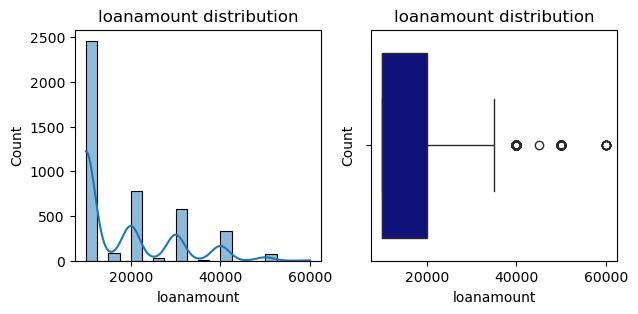

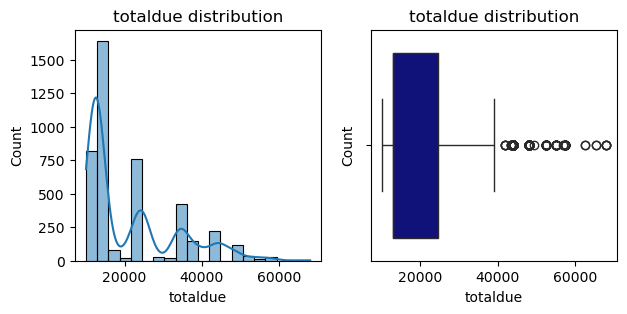

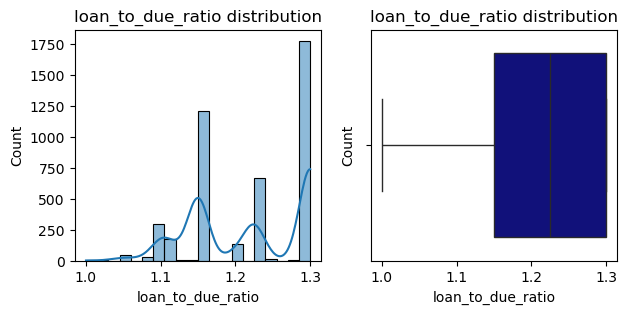

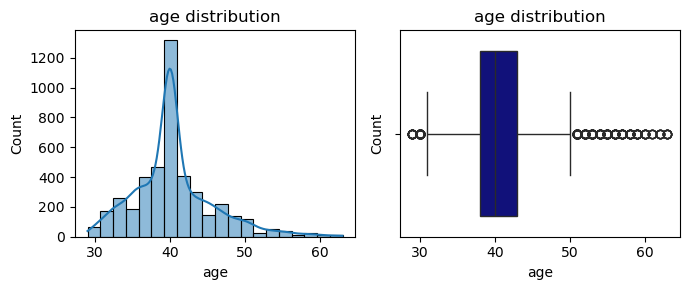

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7, 3))
    # plot histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df6[col], kde=True, bins=20)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    # plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df6[col], color='darkblue')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observation
+ Only the age seems to be well distributed, probably because I filled the missing values with the median age

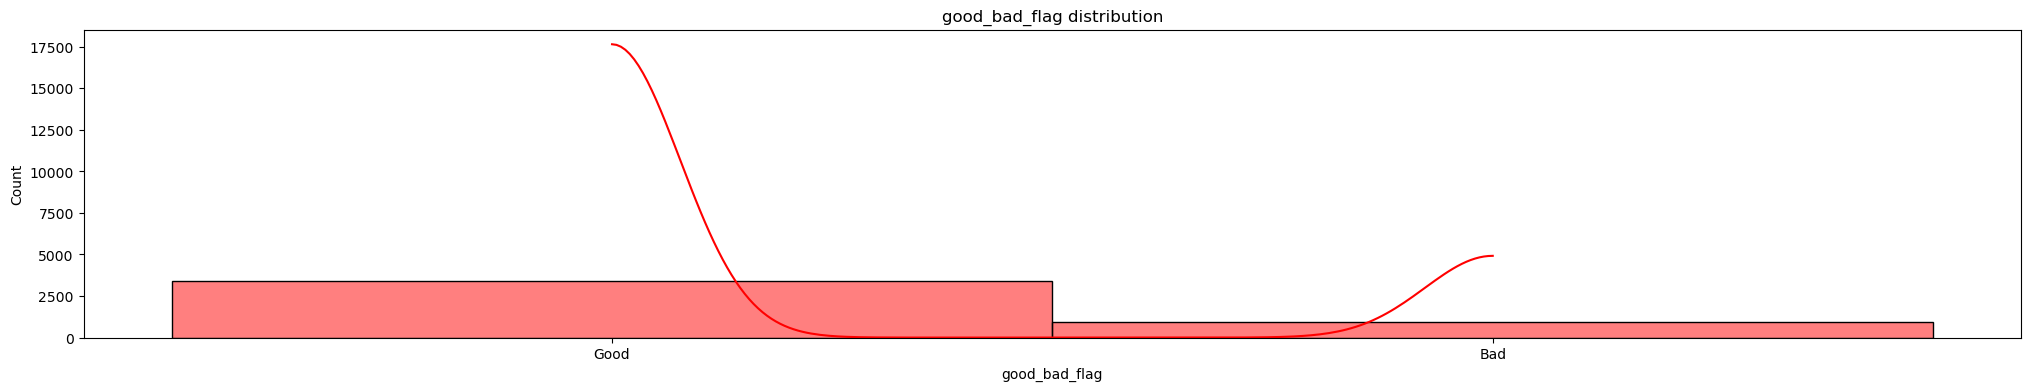

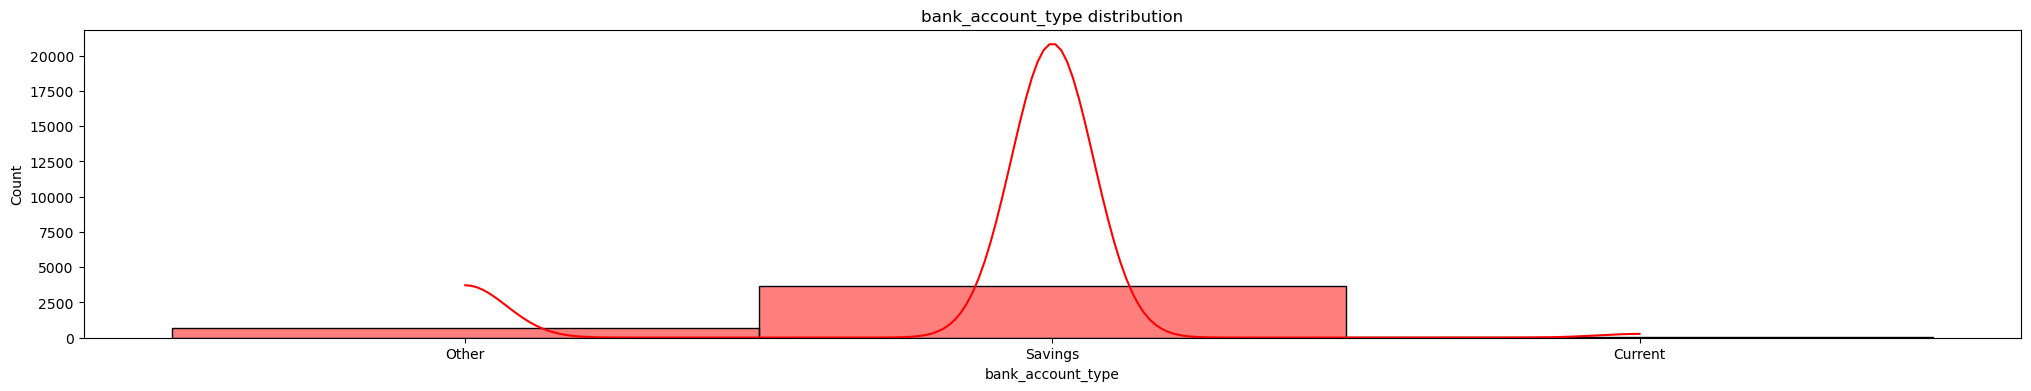

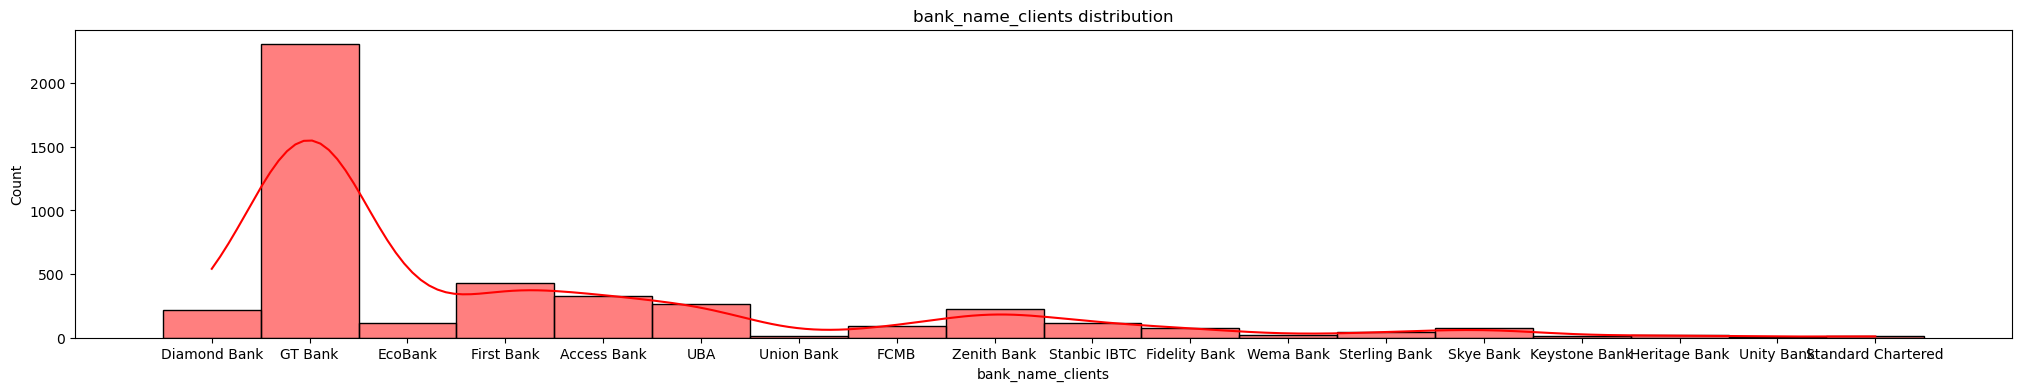

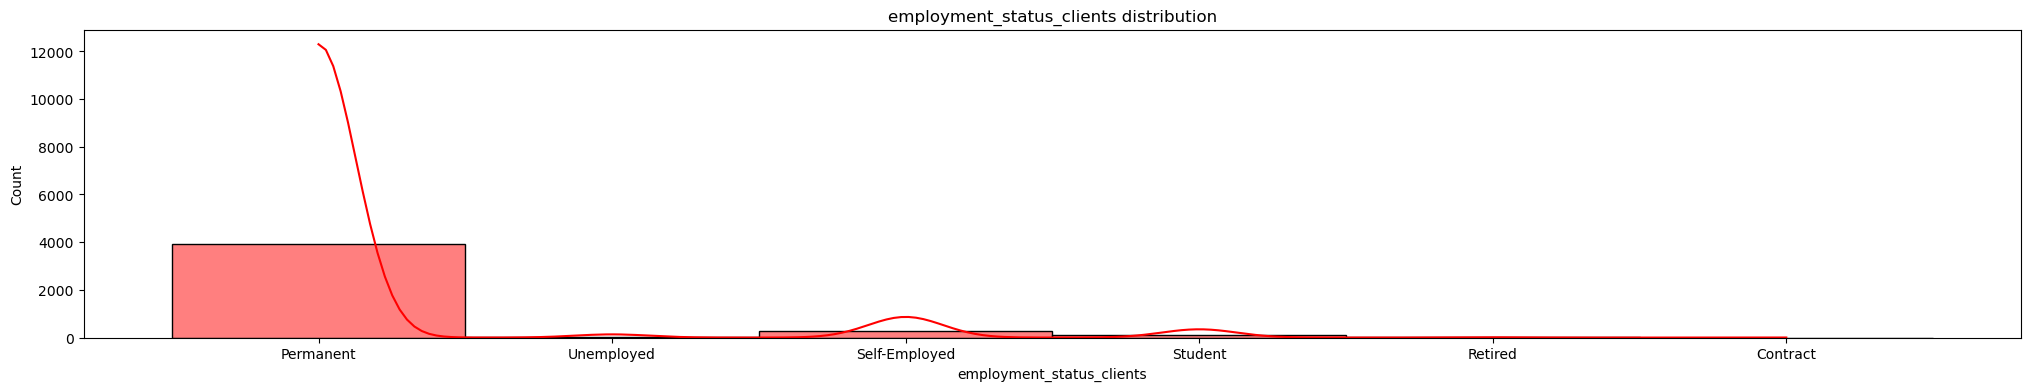

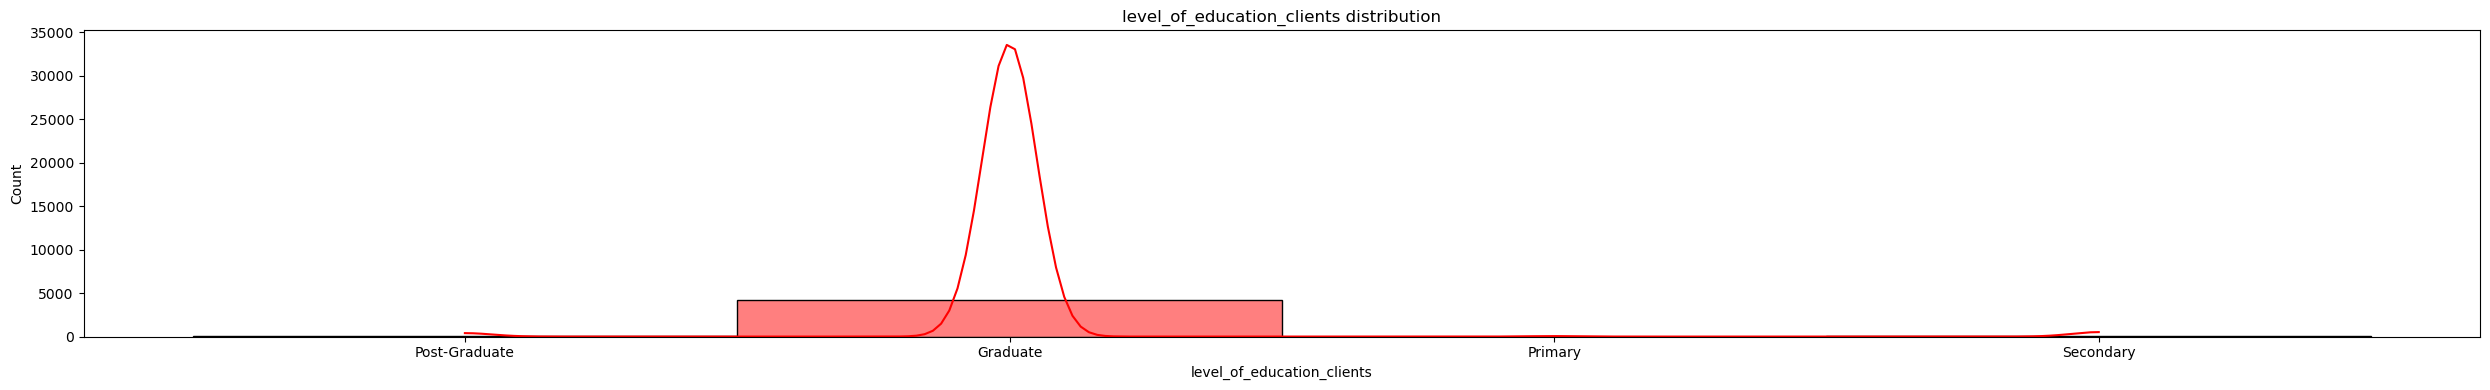

In [ ]:
# visualize the categorical columns
for col in cat_cols:
    plt.figure(figsize=(25, 4))
    sns.histplot(df6[col], kde=True, bins=30, color='red')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observation
+ GTBank gives out the most loans to a lot of permanent staff - this could be because permanent staff are more likely to pay back

In [ ]:
#the data is skewed, I'll use the interquartile range (IQR) to determine the outliers
def find_outliers_IQR(num_cols):
   q1 = num_cols.quantile(0.25)
   q3 = num_cols.quantile(0.75)

   IQR = q3-q1

   outliers = num_cols[((num_cols<(q1-1.5*IQR)) | (num_cols>(q3+1.5*IQR)))]

   return outliers

In [ ]:
for col in num_cols:
    outliers = find_outliers_IQR(df6[col])
    print(f'number of outliers in {col}: '+ str(len(outliers)))
    print(f'max outlier value in {col}: '+ str(outliers.max()))
    print(f'min outlier value in {col}: '+ str(outliers.min()))

    outliers

number of outliers in loanamount: 419
max outlier value in loanamount: 60000.0
min outlier value in loanamount: 40000.0
number of outliers in totaldue: 422
max outlier value in totaldue: 68100.0
min outlier value in totaldue: 42000.0
number of outliers in loan_to_due_ratio: 0
max outlier value in loan_to_due_ratio: nan
min outlier value in loan_to_due_ratio: nan
number of outliers in age: 290
max outlier value in age: 63.0
min outlier value in age: 29.0


In [ ]:
#target column = good_bad_flag
df6.good_bad_flag.value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

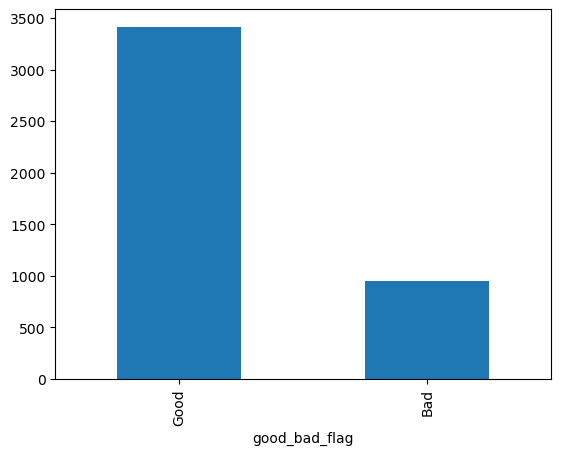

In [ ]:
df6.good_bad_flag.value_counts().plot(kind='bar')

### Observation
+ The target column is quite imbalanced

### Correlation Matrix

In [ ]:
corr_matrix = df6[num_cols].corr()
corr_matrix

,loanamount,totaldue,loan_to_due_ratio,age
loanamount,1.000000,0.994392,-0.518592,0.012344
totaldue,0.994392,1.000000,-0.443280,0.014983
loan_to_due_ratio,-0.518592,-0.443280,1.000000,0.024816
age,0.012344,0.014983,0.024816,1.000000


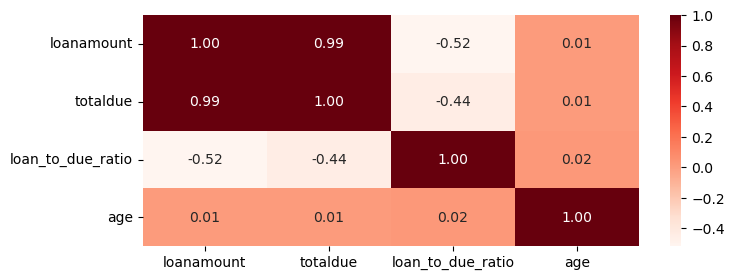

In [ ]:
corr_matrix = df6[num_cols].corr()
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Reds')
plt.show()

### Data Preparation

In [ ]:
df6.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'loan_to_due_ratio', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'age'],
      dtype='object')

In [ ]:
X = df6.drop(columns=['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'bank_account_type', 'bank_name_clients', 'longitude_gps', 'latitude_gps', 'good_bad_flag'])
y = df6['good_bad_flag']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Data Preprocessing - Pipeline Creation

In [ ]:
# split into num and cat columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
num_cols

['totaldue', 'termdays', 'loan_to_due_ratio', 'age']

In [ ]:
cat_cols

['employment_status_clients', 'level_of_education_clients']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# create a pipeline for the preprocessing
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
# apply preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['totaldue', 'termdays', 'loan_to_due_ratio',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['employment_status_clients',
                                  'level_of_education_clients'])])

In [ ]:
pip install lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use several models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [ ]:
#define the models

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Hist Gradient Boost": HistGradientBoostingClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "Light GBM": LGBMClassifier(verbose=0, random_state=42),
    "Cat Boost": CatBoostClassifier(verbose=0, random_state=42)
}

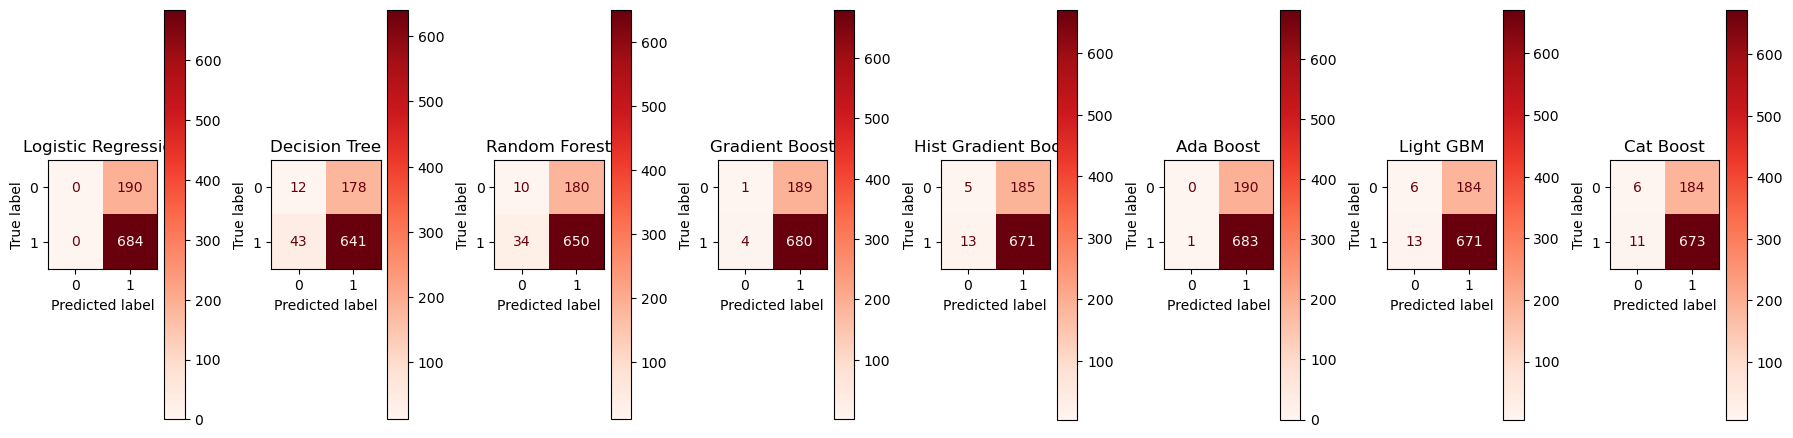

In [ ]:
# using a for loop to fit and evaluate the six models
results = {}

fig, axes = plt.subplots(1, 8, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    pipeline=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # train models
    pipeline.fit(X_train, y_train)

    # predict the training and test scores
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # evaluate model predictions
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, average='binary', pos_label='Good')
    recall = recall_score(y_test, test_pred, average='binary', pos_label='Good')

    # store results
    results[name] = {
        "Training Accuracy": train_score,
        "Test Accuracy": test_score,
        "Precision Score": precision,
        "Recall Score": recall
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], cmap='Reds')
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

In [ ]:
# print metrics
from IPython.display import display, Markdown

display(Markdown('**Metrics**'))
metrics_df = pd.DataFrame(results)
metrics_df.T.round(2)

**Metrics**

,Training Accuracy,Test Accuracy,Precision Score,Recall Score
Logistic Regression,0.78,0.78,0.78,1.00
Decision Tree,0.81,0.75,0.78,0.94
Random Forest,0.81,0.76,0.78,0.95
Gradient Boost,0.79,0.78,0.78,0.99
Hist Gradient Boost,0.79,0.77,0.78,0.98
Ada Boost,0.78,0.78,0.78,1.00
Light GBM,0.79,0.77,0.78,0.98
Cat Boost,0.79,0.78,0.79,0.98


### Observation
#### The top 3 models based on their test accuracy, precision, and recall are as follows:
+ Ada Boost - balanced, does not overfit
+ Gradient Boost - very strong, slight overfitting
+ Cat Boost - Performs nearly identical to Gradient Boost; slightly lower recall

#### Poorly trained models:
+ Decision Tree: overfits
+ Random Forest: Similar to Decision Tree but with slightly higher recall

#### In between:
+ Logistic Regression - excellent recall, balanced precision and accuracy but limited in complexity as it may not capture non-linear relationships as well as ensemble models
+ Light GBM / Hist GBM: Solid but slightly behind the top 3

In [ ]:
#taking Ada Boost as the best model

final_model= AdaBoostClassifier(algorithm='SAMME', random_state=42)

pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])
# train the final model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['totaldue', 'termdays',
                                                   'loan_to_due_ratio',
                                                   'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['employment_status_clients',
                                                   'level_of_education_clients'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', random_state=42))])

In [ ]:
# predict and evaluate
test_pred = pipeline.predict(X_test)

precision = precision_score(y_test, test_pred, pos_label='Good')
recall = recall_score(y_test, test_pred, pos_label='Good')

print(f' AdaBoost\n Precision = {precision:.4f}, Recall = {recall:.4f}')

 AdaBoost
 Precision = 0.7826, Recall = 1.0000


### Feature Importance

In [ ]:
list[preprocessor.named_transformers_['cat']]

list[Pipeline(steps=[('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])]

In [ ]:
list[preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)]

list[array(['employment_status_clients_Contract',
       'employment_status_clients_Permanent',
       'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student',
       'employment_status_clients_Unemployed',
       'level_of_education_clients_Graduate',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary'], dtype=object)]

In [ ]:
final_model.fit(preprocessor.transform(X_train), y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [ ]:
num_cols

['totaldue', 'termdays', 'loan_to_due_ratio', 'age']

In [ ]:
cat_cols

['employment_status_clients', 'level_of_education_clients']

In [ ]:
feature_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)))
feature_names

['totaldue',
 'termdays',
 'loan_to_due_ratio',
 'age',
 'employment_status_clients_Contract',
 'employment_status_clients_Permanent',
 'employment_status_clients_Retired',
 'employment_status_clients_Self-Employed',
 'employment_status_clients_Student',
 'employment_status_clients_Unemployed',
 'level_of_education_clients_Graduate',
 'level_of_education_clients_Post-Graduate',
 'level_of_education_clients_Primary',
 'level_of_education_clients_Secondary']

In [ ]:
importance = final_model.feature_importances_
importance

array([0.79787543, 0.02224561, 0.1419702 , 0.03790875, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
sort = np.argsort(importance)[::-1]

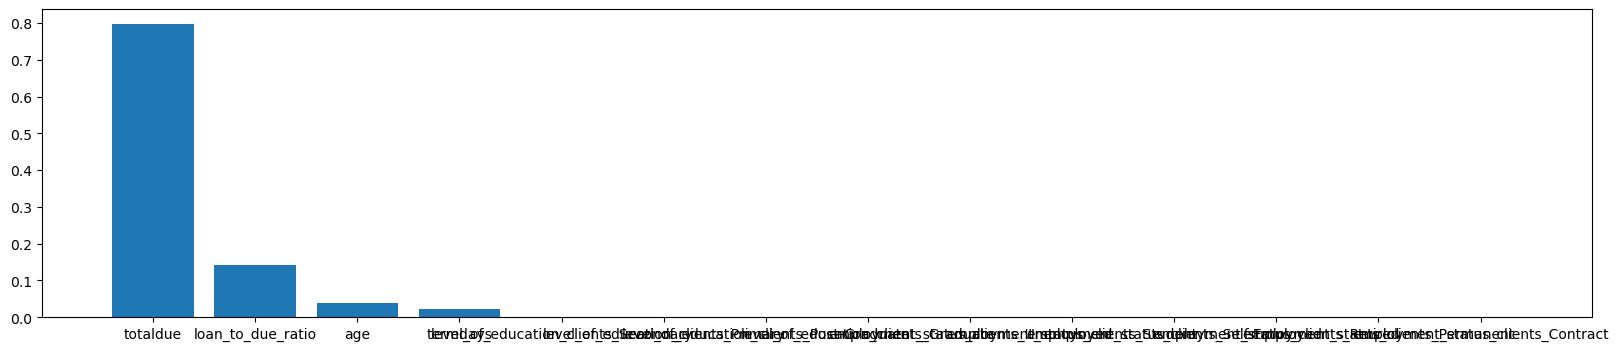

In [ ]:
plt.figure(figsize=(20, 4))

plt.bar(range(len(importance)), importance[sort])
plt.xticks(range(len(importance)), np.array(feature_names) [sort])
plt.show()

In [ ]:
#export final dataset as an excel file
df6.to_excel("loan_default.xlsx", index=False)

In [ ]:
df6.sample()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,loan_to_due_ratio,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
4358,8a858fe957a094e00157af1391dc68d9,301996078,12,2017-07-25 22:46:48.000000,2017-07-25 21:46:41.000000,30000.0,34500.0,30,Good,1.15,Other,4.553353,8.481867,Keystone Bank,Permanent,Graduate,41.0


In [ ]:
print(df6['loan_to_due_ratio'].max())
print(df6['loan_to_due_ratio'].min())

1.3
1.0


In [ ]:
X

,totaldue,termdays,loan_to_due_ratio,employment_status_clients,level_of_education_clients,age
0,34500.0,30,1.1500,Permanent,Post-Graduate,53.0
1,17250.0,30,1.1500,Permanent,Graduate,40.0
2,22250.0,15,1.1125,Permanent,Graduate,40.0
3,11500.0,15,1.1500,Permanent,Graduate,47.0
4,44000.0,30,1.1000,Permanent,Primary,39.0
...,...,...,...,...,...,...
4363,13000.0,30,1.3000,Permanent,Graduate,40.0
4364,13000.0,30,1.3000,Permanent,Graduate,35.0
4365,11500.0,15,1.1500,Permanent,Graduate,35.0
4366,13000.0,30,1.3000,Permanent,Graduate,35.0


In [ ]:
X.dtypes

totaldue                      float64
termdays                        int64
loan_to_due_ratio             float64
employment_status_clients      object
level_of_education_clients     object
age                           float64
dtype: object

In [ ]:
y

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
4363     Bad
4364     Bad
4365     Bad
4366     Bad
4367     Bad
Name: good_bad_flag, Length: 4368, dtype: object

In [ ]:
df6['age'].max()

63.0

In [ ]:
df6['age'].min()

29.0

In [ ]:
df6['level_of_education_clients'].value_counts()

level_of_education_clients
Graduate         4246
Secondary          65
Post-Graduate      50
Primary             7
Name: count, dtype: int64

In [ ]:
df6['employment_status_clients'].value_counts()

employment_status_clients
Permanent        3932
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: count, dtype: int64

In [ ]:
df6['totaldue'].min()

10000.0

In [ ]:
df6['totaldue'].max()

68100.0